In [2]:
%pylab inline
from scipy.spatial import KDTree,cKDTree

Populating the interactive namespace from numpy and matplotlib


In [24]:
def thetaE(Dl,Ds,mass):
    """
    Einstein Radius
    Inputs:
    Dl: distance to lens in units of [pc]
    Ds: distnace to source in units of [pc]
    mass: mass of point source
    """
    m_solar = 2.0e30 #solar mass in kg
    mass = mass * m_solar
    G = 6.67408e-11 #N m^2 kg^-2
    pc = 3.086e16 #pc to meters
    Dl = Dl*pc
    Ds = Ds*pc 
    Dls = (Ds-Dl)*pc
    c = 299792458.0 # speed of light m/s
    
    return ((Dls/(Ds*Dl))*(4.0*G*mass/(c**2)))**(1/2)

def beta(theta,thetaE):
    """
    The Lens Equation, made simple by pulling down the thetaE equation
    """
    return theta - thetaE**2/theta



In [25]:
ThetaE1 = thetaE(500,1000,3e8)
arc_conv = np.radians(0.01/60) #scale of 0.01 arcmin/pixel


In [26]:
#constructing the field space
x1 = np.linspace(-10,10,1000)
y1 = np.linspace(-10,10,1000)
X1, Y1 = np.meshgrid(x1,y1)
scalar1 = 2.0
difX1, difY1 = np.meshgrid(np.linspace(-ThetaE1, ThetaE1,1000), np.linspace(-ThetaE1, ThetaE1, 1000))
difX1 = difX1 * scalar1
difY1 = difY1 * scalar1


In [27]:
thetaP = np.arctan2(difX1, difY1) # polar conversion
theta_grav = np.sqrt(difX1**2.0 + difY1**2.0) # make theta with arc_conv

beta_grav = beta(theta_grav, ThetaE1)
#converting the X and Y to new coords
# I can just write over the old variables since Jupyter works in cells
newX1 = beta_grav * np.cos(thetaP)
newY1 = beta_grav * np.sin(thetaP)


In [28]:
d1 = cKDTree(np.array([difX1.ravel(), difY1.ravel()]).T)
d, idx = d1.query(np.array([newX1.ravel(), newY1.ravel()]).T, k=1)
#A KDTree which I don't fully understand, but it's working so

In [29]:
def Gauss2d(x, y, mu_x, mu_y, sigma_x, sigma_y):
    norm = 1.0 / (2 * np.pi * sigma_x * sigma_y)
    exp = np.exp(-((x - mu_x)**2.0 / (2.0*sigma_x**2.0) + (y - mu_y)**2.0 / (2.0*sigma_y**2.0)))
    return norm * exp

In [30]:
#Creating the Gauss2d source, from above
Z1 = Gauss2d(X1, Y1, 0, 0, 0.5, 0.5)
Z2 = Gauss2d(X1, Y1, -2.5, -2, 0.5, 0.5)


In Z1 we have the source in  directly behind the lens and in Z2 we move the source so it is "just inside the radius of the Einstein radius of the lens "

(1000000,)
1.39098994901e-133
(1000000,)
3.57795889885e-74


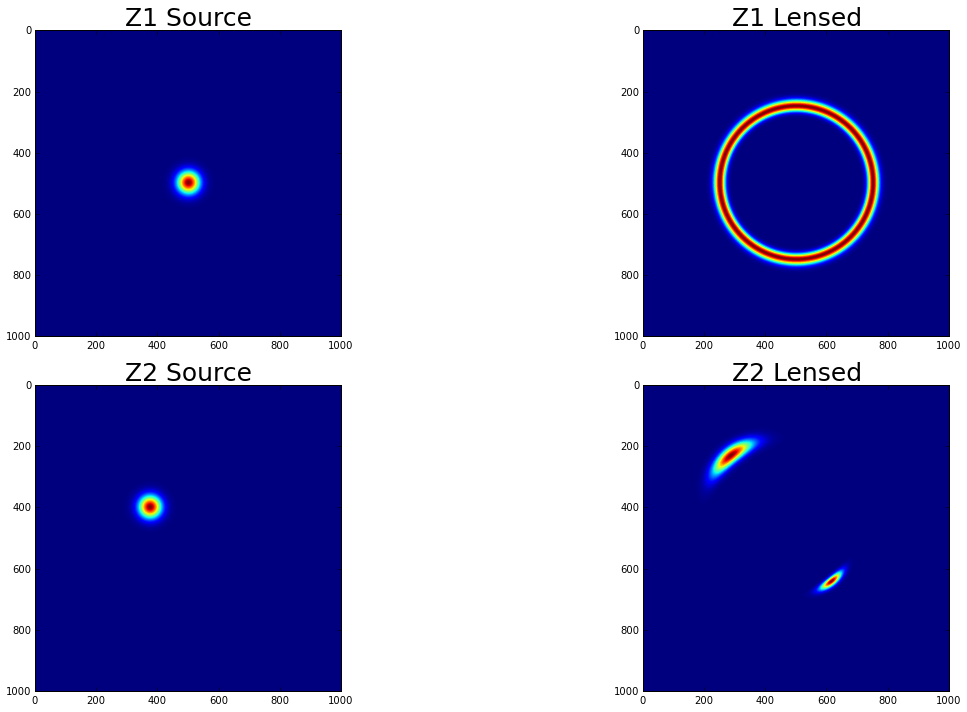

In [31]:
Values1 = Z1.ravel()[idx]
print (Values1.shape)
print (Values1[1])
Image1 = np.asarray(Values1).reshape(1000,1000)

Values2 = Z2.ravel()[idx]
print (Values2.shape)
print (Values2[1])
Image2 = np.asarray(Values2).reshape(1000,1000)

fig, ax = plt.subplots(2,2,figsize=(20,10))
ax[0,0].imshow(Z1)
ax[0,1].imshow(Image1)
ax[1,0].imshow(Z2)
ax[1,1].imshow(Image2)

ax[0,0].set_title('Z1 Source',fontsize=25)
ax[0,1].set_title('Z1 Lensed',fontsize=25)
ax[1,0].set_title('Z2 Source',fontsize=25)
ax[1,1].set_title('Z2 Lensed',fontsize=25)
fig.tight_layout()

plt.show()



for comparison with Z1, Z3 is a slightly off center source.

(1000000,)
1.1083015996e-165


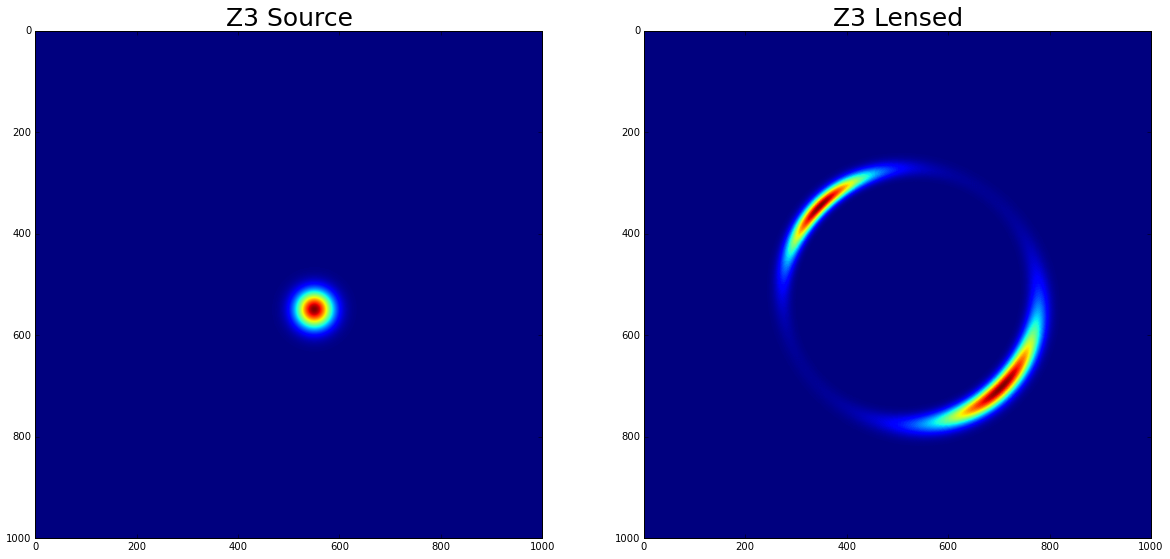

In [32]:
Z3 = Gauss2d(X1, Y1, 1, 1, 0.5, 0.5)
Values3 = Z3.ravel()[idx]
print (Values3.shape)
print (Values3[1])
Image3 = np.asarray(Values3).reshape(1000,1000)
fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].imshow(Z3)
ax[1].imshow(Image3)
ax[0].set_title('Z3 Source',fontsize=25)
ax[1].set_title('Z3 Lensed',fontsize=25)